# FBProphet - PM2.5

## Import Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/data_imputed.csv')
df.head()

,timestamp_local,temp,city_name,country_code,aqi,co,no2,o3,pm10,pm25,so2
0,2022-02-01 00:00:00,12.6,Gujrāt,PK,385.0,1339.8,76.0,10.7,491.7,347.67,238.0
1,2022-02-01 01:00:00,11.5,Gujrāt,PK,404.0,1437.6,76.0,9.3,508.3,359.33,268.0
2,2022-02-01 02:00:00,11.9,Gujrāt,PK,421.0,1535.5,76.0,8.0,525.0,371.00,298.0
3,2022-02-01 03:00:00,12.2,Gujrāt,PK,425.0,1659.0,68.3,5.3,529.3,374.00,275.7
4,2022-02-01 04:00:00,11.9,Gujrāt,PK,430.0,1782.5,60.7,2.7,533.7,377.00,253.3


In [3]:
df['timestamp_local'] = pd.to_datetime(df['timestamp_local'])

In [4]:
data = df[['timestamp_local','pm25']]

In [5]:
data = data.rename(columns={'timestamp_local': 'ds', 'pm25': 'y'})

In [6]:
X = data[:-168]

In [7]:
y = data[-168:]

## Model Fitting

In [8]:
from prophet import Prophet

In [9]:
m = Prophet()
m.fit(X)

23:13:03 - cmdstanpy - INFO - Chain [1] start processing
23:13:11 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future = m.make_future_dataframe(periods=7*24, freq='H')
future.tail()

C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
18211,2024-02-29 19:00:00
18212,2024-02-29 20:00:00
18213,2024-02-29 21:00:00
18214,2024-02-29 22:00:00
18215,2024-02-29 23:00:00


In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
18211,2024-02-29 19:00:00,42.654540,-7.366878,92.467714
18212,2024-02-29 20:00:00,52.859904,1.852238,105.693051
18213,2024-02-29 21:00:00,60.195959,15.233791,109.098816
18214,2024-02-29 22:00:00,64.419363,12.499808,111.654708
18215,2024-02-29 23:00:00,66.746962,14.368885,115.152030


C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


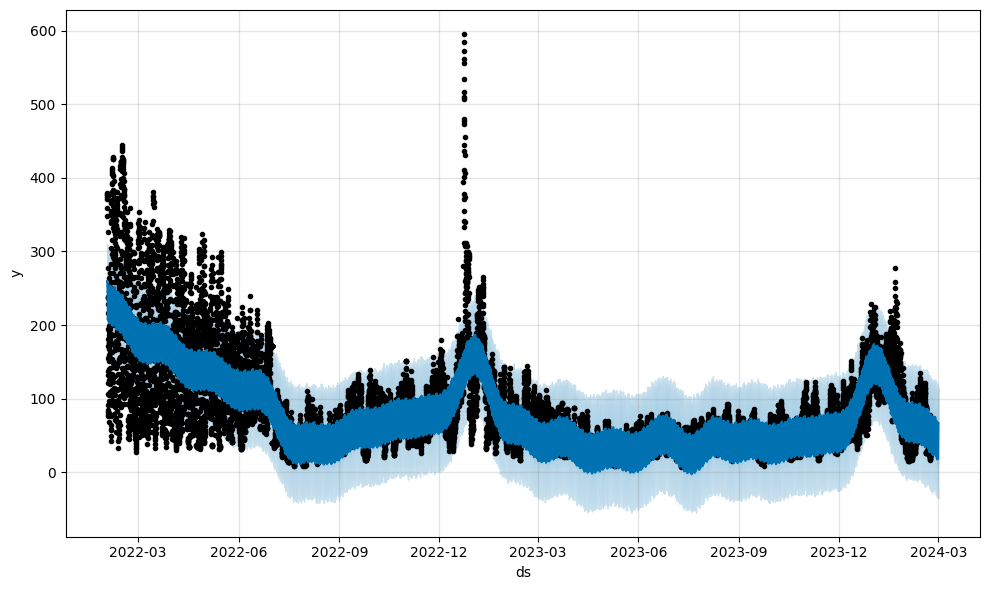

In [12]:
fig1 = m.plot(forecast)

C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Se

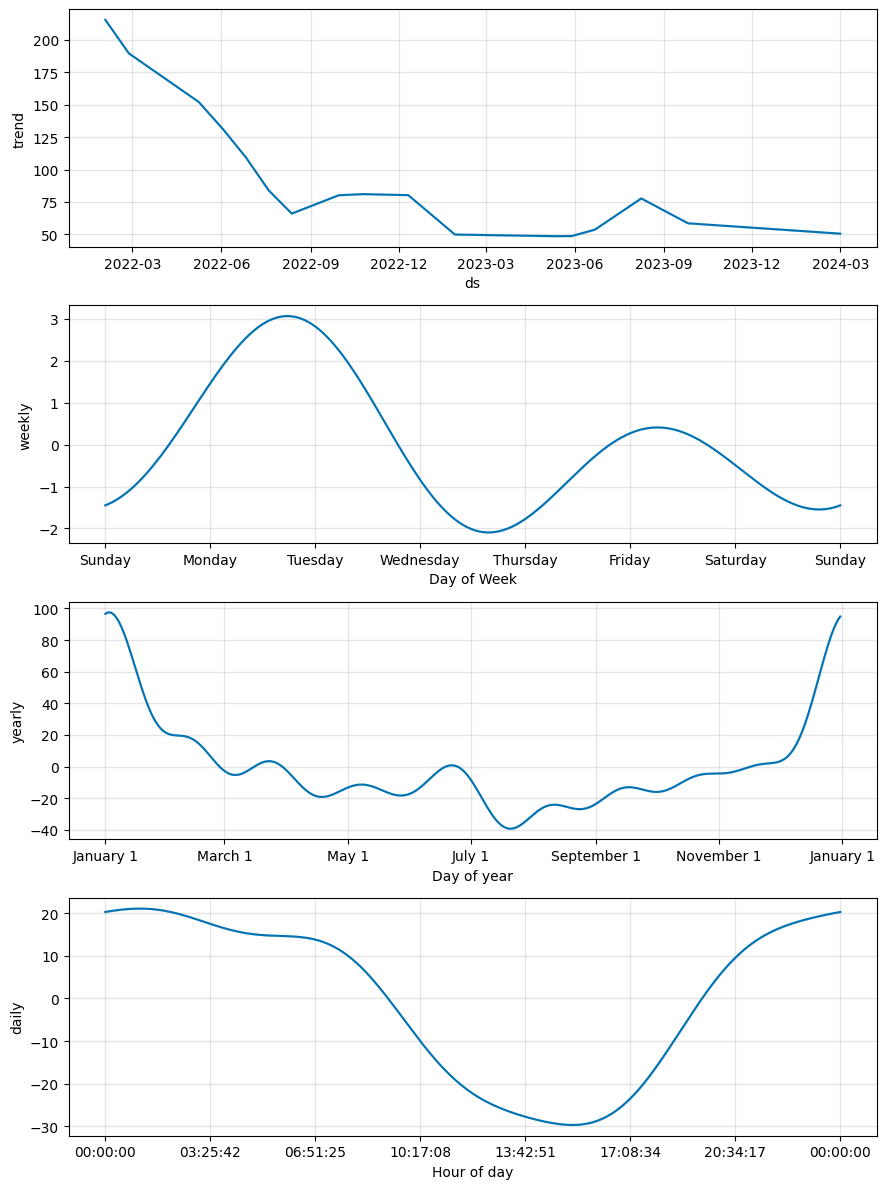

In [13]:
fig2 = m.plot_components(forecast)

In [14]:
predicted = forecast[-168:]

In [15]:
((y['y']-predicted['yhat'])**2).mean()**0.5

20.511214994474788

## Non Stationary

In [16]:
m = Prophet(interval_width=0.95)
m.fit(X)

23:13:26 - cmdstanpy - INFO - Chain [1] start processing
23:13:34 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
future = m.make_future_dataframe(periods=7*24, freq='H')
future.tail()

C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
18211,2024-02-29 19:00:00
18212,2024-02-29 20:00:00
18213,2024-02-29 21:00:00
18214,2024-02-29 22:00:00
18215,2024-02-29 23:00:00


In [18]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
18211,2024-02-29 19:00:00,42.654540,-27.002597,120.108689
18212,2024-02-29 20:00:00,52.859904,-16.673084,130.681328
18213,2024-02-29 21:00:00,60.195959,-15.288420,138.148520
18214,2024-02-29 22:00:00,64.419363,-12.338488,140.316747
18215,2024-02-29 23:00:00,66.746962,-13.552544,141.378964


<Axes: xlabel='ds'>

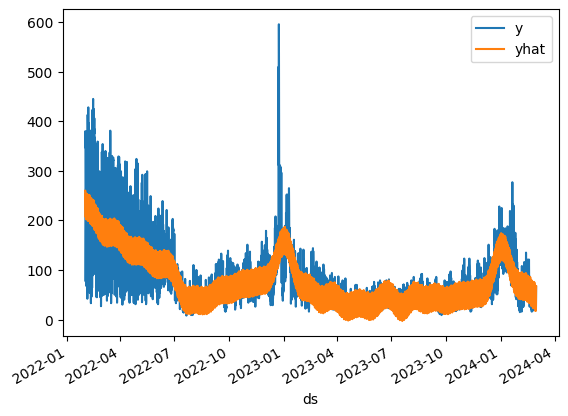

In [19]:
pd.concat([data.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

In [20]:
((y['y']-predicted['yhat'])**2).mean()**0.5

20.511214994474788

## Multiplicative

In [21]:
m = Prophet(interval_width=0.95, seasonality_mode='multiplicative')
m.fit(X)

23:13:47 - cmdstanpy - INFO - Chain [1] start processing
23:14:03 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
future = m.make_future_dataframe(periods=7*24, freq='H')
future.tail()

C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
18211,2024-02-29 19:00:00
18212,2024-02-29 20:00:00
18213,2024-02-29 21:00:00
18214,2024-02-29 22:00:00
18215,2024-02-29 23:00:00


In [23]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
18211,2024-02-29 19:00:00,45.263638,-18.745540,112.421111
18212,2024-02-29 20:00:00,56.528139,-3.747568,121.450529
18213,2024-02-29 21:00:00,64.752957,-0.493587,132.283400
18214,2024-02-29 22:00:00,70.021594,6.218522,131.807348
18215,2024-02-29 23:00:00,73.996507,11.449672,139.581005


<Axes: xlabel='ds'>

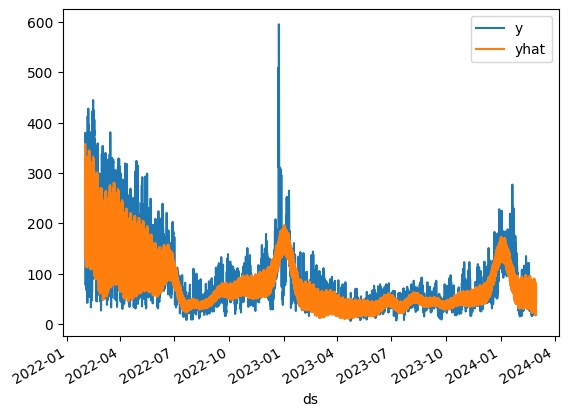

In [24]:
pd.concat([data.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

In [25]:
((data['y']-forecast['yhat'])**2).mean()**0.5

32.878019323862326

In [26]:
from prophet.diagnostics import cross_validation,  performance_metrics
cv_results = cross_validation( model = m, initial = '600 days', horizon = '30 days')
df_p = performance_metrics(cv_results)
df_p

  0%|          | 0/9 [00:00<?, ?it/s]

23:14:10 - cmdstanpy - INFO - Chain [1] start processing
23:14:20 - cmdstanpy - INFO - Chain [1] done processing
23:14:23 - cmdstanpy - INFO - Chain [1] start processing
23:14:31 - cmdstanpy - INFO - Chain [1] done processing
23:14:33 - cmdstanpy - INFO - Chain [1] start processing
23:14:41 - cmdstanpy - INFO - Chain [1] done processing
23:14:44 - cmdstanpy - INFO - Chain [1] start processing
23:14:52 - cmdstanpy - INFO - Chain [1] done processing
23:14:55 - cmdstanpy - INFO - Chain [1] start processing
23:15:08 - cmdstanpy - INFO - Chain [1] done processing
23:15:11 - cmdstanpy - INFO - Chain [1] start processing
23:15:20 - cmdstanpy - INFO - Chain [1] done processing
23:15:23 - cmdstanpy - INFO - Chain [1] start processing
23:15:36 - cmdstanpy - INFO - Chain [1] done processing
23:15:39 - cmdstanpy - INFO - Chain [1] start processing
23:15:49 - cmdstanpy - INFO - Chain [1] done processing
23:15:52 - cmdstanpy - INFO - Chain [1] start processing
23:16:04 - cmdstanpy - INFO - Chain [1]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days 00:00:00,729.813545,27.015061,21.117786,0.317545,0.245503,0.305863,0.978395
1,3 days 01:00:00,736.300822,27.134864,21.263016,0.319800,0.246280,0.308240,0.978395
2,3 days 02:00:00,740.467581,27.211534,21.358913,0.321385,0.246354,0.309884,0.978395
3,3 days 03:00:00,741.786498,27.235758,21.402601,0.321885,0.246871,0.310622,0.978395
4,3 days 04:00:00,742.983192,27.257718,21.453263,0.322450,0.247564,0.311426,0.978395
...,...,...,...,...,...,...,...,...
644,29 days 20:00:00,3086.970800,55.560515,41.038107,0.466920,0.399684,0.572405,0.814815
645,29 days 21:00:00,3063.698384,55.350685,40.979673,0.467897,0.402551,0.572984,0.814815
646,29 days 22:00:00,3026.640544,55.014912,40.875486,0.469103,0.403305,0.573627,0.814815
647,29 days 23:00:00,2975.732974,54.550279,40.719653,0.470339,0.403827,0.574197,0.814815
